# Red Wine Quality Prediction

## Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Attribute Information

Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

### Importing libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
print("setup complete")

setup complete


### Loading Dataset

In [2]:
df = pd.read_csv("winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#checking shape of dataset
df.shape

(1599, 12)

In [4]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#statistical summary
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#correlation in the dataset
cor = df.corr()
cor

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [7]:
#checking missing values 
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### Visualistaion and Analysis

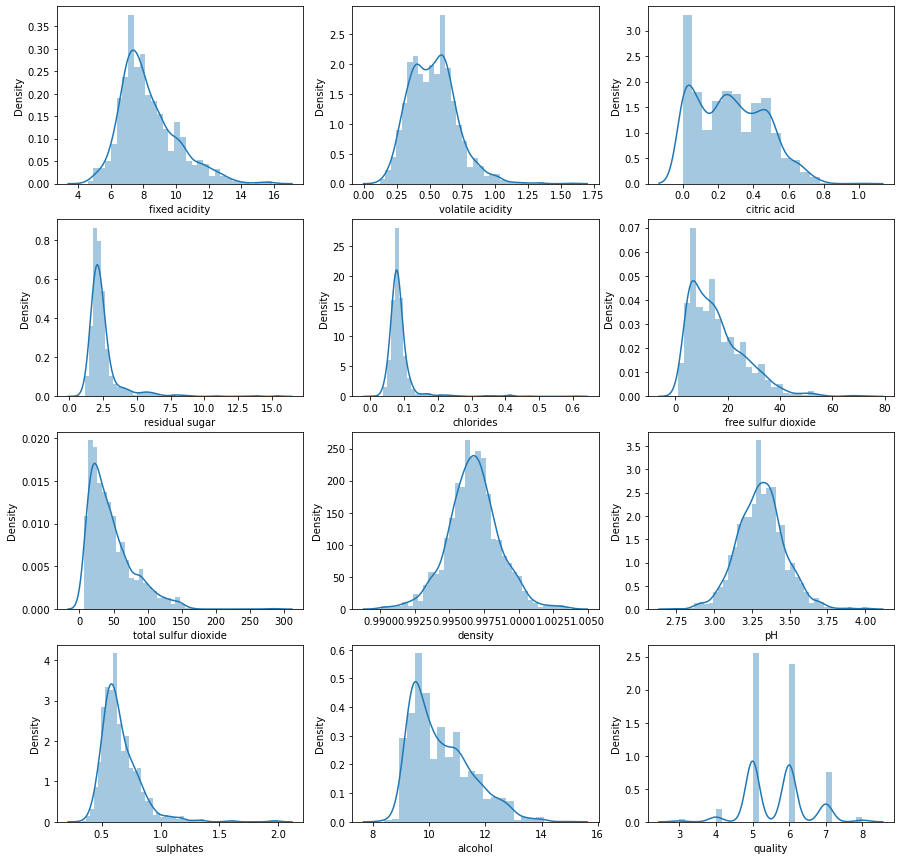

In [8]:
#distribution plots for checking distribution of the attributes
plot = 1
plt.figure(figsize=(15,15))
for i in df.columns:
    if plot <= 12:
        plt.subplot(4,3,plot)
        sns.distplot(df[i])
        plot=plot+1
plt.show()

All the atributes have skewness present as none of them are normally distributes.

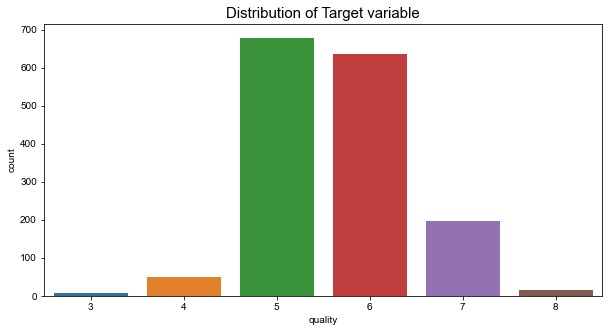

In [9]:
plt.figure(figsize=(10,5))
plt.title("Distribution of Target variable",fontsize=15)
sns.set_style("darkgrid")
sns.countplot(df["quality"])
plt.show()

In [10]:
df.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

The above plot shows the distribution of classes in target variable

There is a class imbalance issue in the dataset which we can see from value count of target variable

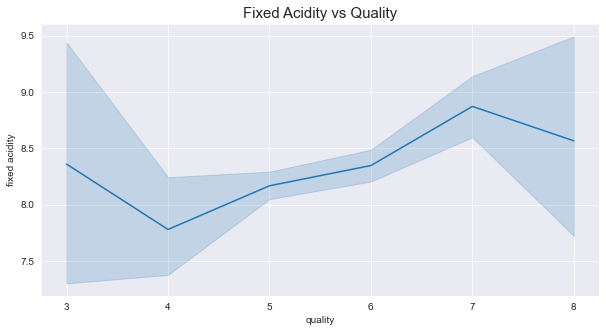

In [11]:
plt.figure(figsize=(10,5))
plt.title("Fixed Acidity vs Quality",fontsize=15)
sns.lineplot(df["quality"],df["fixed acidity"])
plt.show()

Fixed acidity does not provide much info to classify quality of red wine

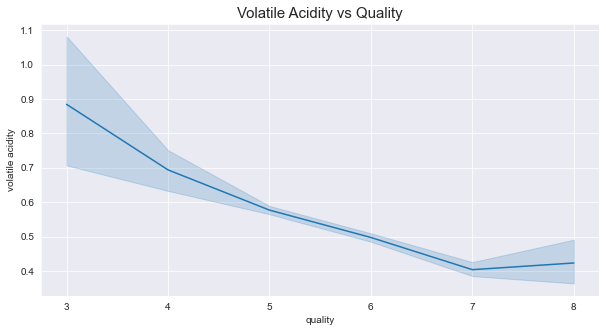

In [12]:
plt.figure(figsize=(10,5))
plt.title("Volatile Acidity vs Quality",fontsize=15)
sns.lineplot(df["quality"],df["volatile acidity"])
plt.show()

Volatile acididty decreases as the wine quality increases

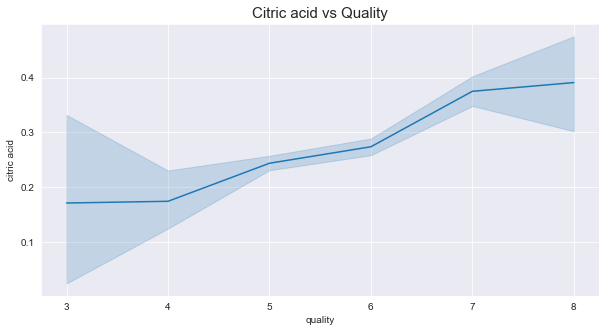

In [13]:
plt.figure(figsize=(10,5))
plt.title("Citric acid vs Quality",fontsize=15)
sns.lineplot(df["quality"],df["citric acid"])
plt.show()

As the citric acid increses the quality of wine increases 

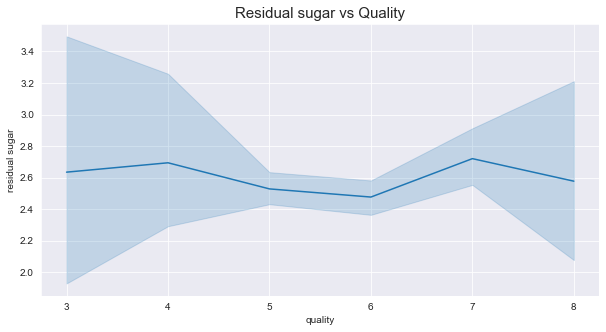

In [14]:
plt.figure(figsize=(10,5))
plt.title("Residual sugar vs Quality",fontsize=15)
sns.lineplot(df["quality"],df["residual sugar"])
plt.show()

Residual sugar gives no exact insight on quality of the wine

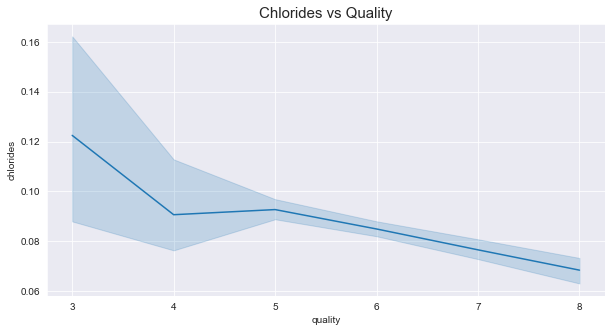

In [15]:
plt.figure(figsize=(10,5))
plt.title("Chlorides vs Quality",fontsize=15)
sns.lineplot(df["quality"],df["chlorides"])
plt.show()

As chloride levels decraese in wine the quality of wine increases

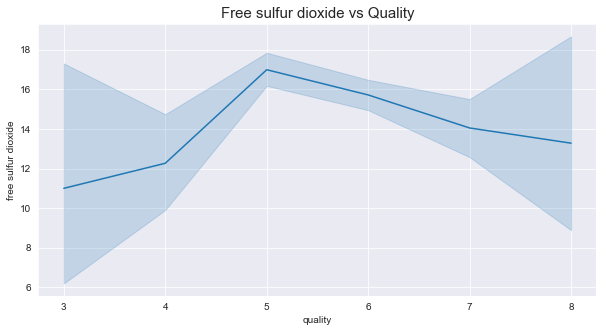

In [16]:
plt.figure(figsize=(10,5))
plt.title("Free sulfur dioxide vs Quality",fontsize=15)
sns.lineplot(df["quality"],df["free sulfur dioxide"])
plt.show()

Not able to see any specific relation of free sulphur dioxide with quality of wine

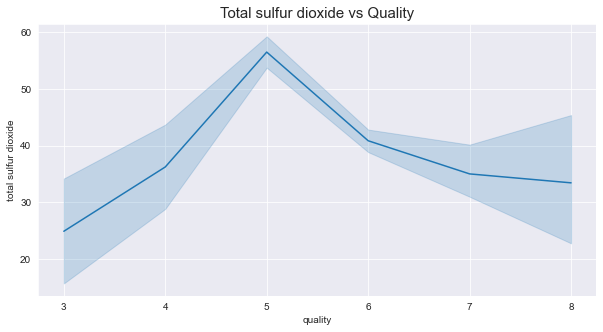

In [17]:
plt.figure(figsize=(10,5))
plt.title("Total sulfur dioxide vs Quality",fontsize=15)
sns.lineplot(df["quality"],df["total sulfur dioxide"])
plt.show()

Total sulfur dioxide also does not show any specifc relation with quality of wine

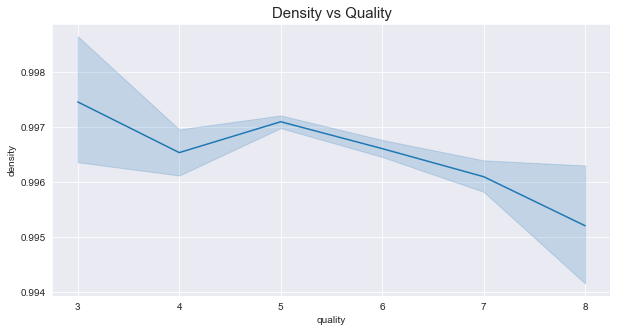

In [18]:
plt.figure(figsize=(10,5))
plt.title("Density vs Quality",fontsize=15)
sns.lineplot(df["quality"],df["density"])
plt.show()

As the Quality of wine increases density decreases

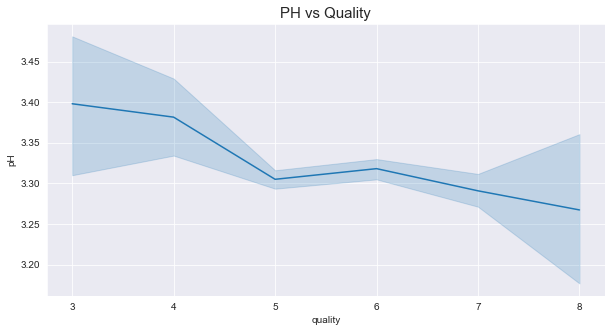

In [19]:
plt.figure(figsize=(10,5))
plt.title("PH vs Quality",fontsize=15)
sns.lineplot(df["quality"],df["pH"])
plt.show()

Good wines have lower pH levels as comapred to bad quality of wines

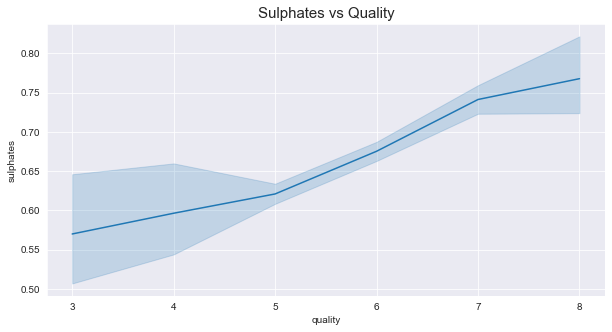

In [20]:
plt.figure(figsize=(10,5))
plt.title("Sulphates vs Quality",fontsize=15)
sns.lineplot(df["quality"],df["sulphates"])
plt.show()

Sulphates icrease as the quality of wine increases

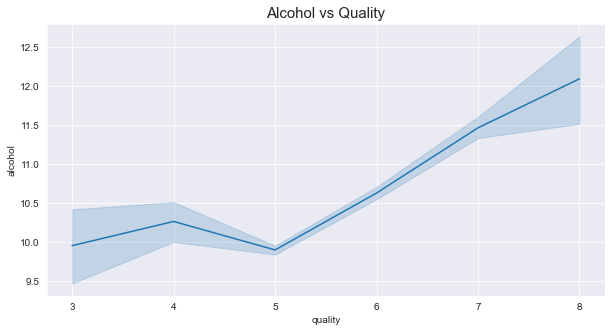

In [21]:
plt.figure(figsize=(10,5))
plt.title("Alcohol vs Quality",fontsize=15)
sns.lineplot(df["quality"],df["alcohol"])
plt.show()

More the alcohol in wine better the quality of wine

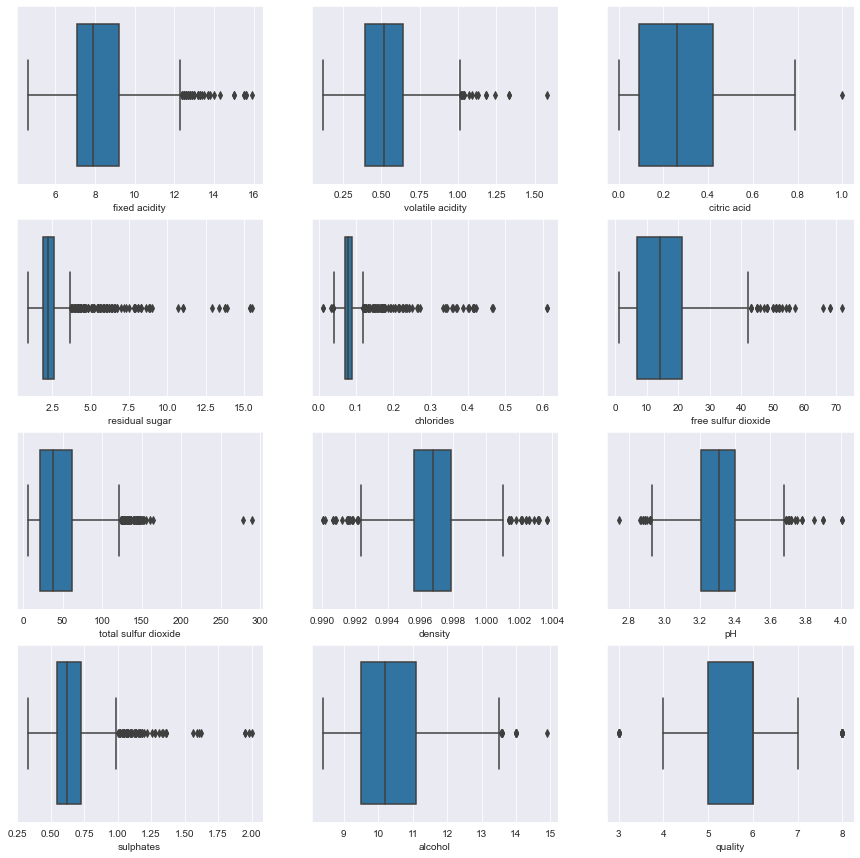

In [22]:
#boxplot for every feature to visualise outliers
plot = 1
plt.figure(figsize=(15,15))
for i in df.columns:
    if plot <= 12:
        plt.subplot(4,3,plot)
        sns.boxplot(df[i])
        plot=plot+1
plt.show()

All the attributes have presence of outliers.

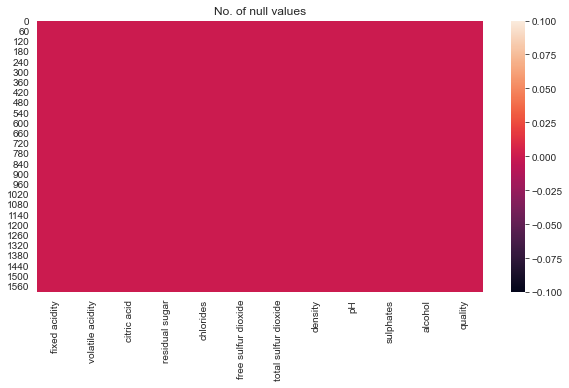

In [23]:
# Visualisation of null values
plt.figure(figsize=(10,5))
plt.title('No. of null values')
sns.heatmap(df.isnull())
plt.show()

From the above plot we can say that the dataset has no missing values

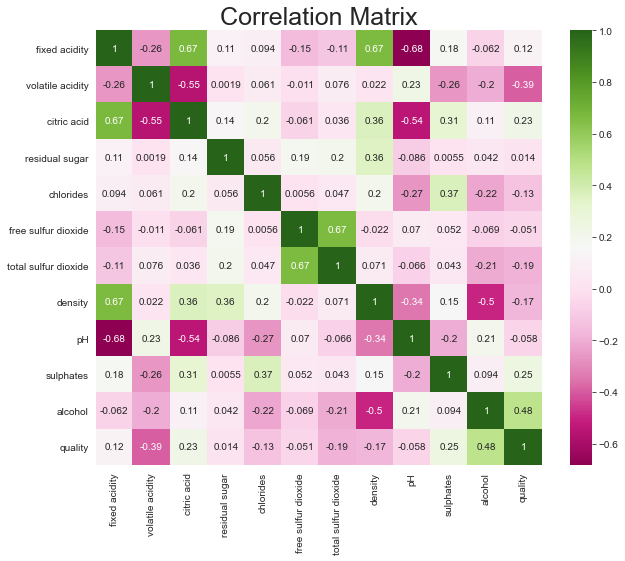

In [24]:
# Visualation of correlation 
plt.figure(figsize=(10,8))
plt.title('Correlation Matrix',fontsize=25)
sns.heatmap(cor,annot=True,cmap='PiYG')
plt.show()

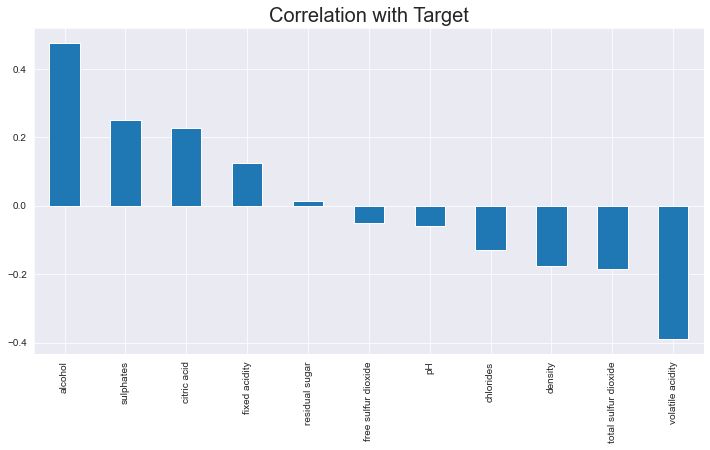

In [25]:
cor['quality'].sort_values(ascending=False).drop(['quality']).plot.bar(figsize=(12,6)) 
plt.title("Correlation with Target",fontsize=20)
plt.show()

From the Above plot we can see the correlation of features in dcreasing order, alcohol having the highest correlation.

Since we have to differentiate between a good and bad wine  we will classify the quality into two categories that is 'good' : wines with quality 7 or higher and 'bad' : wines with quality lower than 7

In [26]:
# using cut method to split the claases into separate bin intervals of bad and good 
df.quality = pd.cut(df.quality, bins = [2,7,8], labels=['bad','good'])
df.quality

0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): ['bad' < 'good']

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


<AxesSubplot:xlabel='quality', ylabel='count'>

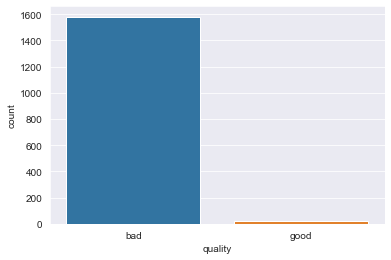

In [28]:
sns.countplot(df.quality)

There is huge imbalance in the dataset so we will balance the dataset by oversampling the dataset

### Cleaning the data

In [29]:
df.dtypes

fixed acidity            float64
volatile acidity         float64
citric acid              float64
residual sugar           float64
chlorides                float64
free sulfur dioxide      float64
total sulfur dioxide     float64
density                  float64
pH                       float64
sulphates                float64
alcohol                  float64
quality                 category
dtype: object

In [31]:
di = df.select_dtypes('float64')
di.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [32]:
#calculating zscore to find outliers
from scipy.stats import zscore
z = np.abs(zscore(di))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 1.28864292, 0.57920652,
        0.96024611],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.7199333 , 0.1289504 ,
        0.58477711],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.33117661, 0.04808883,
        0.58477711],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.70550789, 0.54204194,
        0.54162988],
       [1.39015528, 0.65462046, 0.77526673, ..., 1.6773996 , 0.30598963,
        0.20930812],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.51112954, 0.01092425,
        0.54162988]])

In [33]:
# dataframe after removal of outliers
df2 = df.loc[((z<3).all(axis=1))]
df2.shape

(1458, 12)

In [34]:
# skewness of dataset
df2.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
dtype: float64

In [35]:
# checking statistical summary 
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,8.312551,0.524050,0.265281,2.388717,0.081531,15.089849,43.660494,0.996718,3.316152,0.642414,10.417798
std,1.647635,0.169451,0.191271,0.865307,0.021218,9.317669,29.414615,0.001718,0.141052,0.129753,1.021649
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.315000,0.620000,10.200000
75%,9.200000,0.635000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000


In [43]:
#Encoding the categorical columns using label encoder
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
df2.quality = LE.fit_transform(df2.quality)
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### Splitting into feature and target variables

In [44]:
X = df2.drop(['quality'],axis='columns')
y = df2.quality

In [45]:
# Since there is class imbalance in dataset applying oversampling
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority')
x_res,y_res = sm.fit_resample(X,y)

In [46]:
x_res.shape,y_res.shape

((2884, 11), (2884,))

<AxesSubplot:xlabel='quality', ylabel='count'>

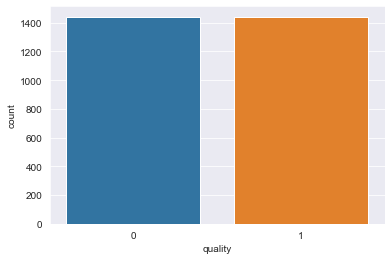

In [47]:
sns.countplot(y_res)

The above plot shows that we have handled class imbalance issue 

## Standardization

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x_res)
x

array([[-0.84184932,  1.5425264 , -1.88661711, ...,  1.79978096,
        -1.10991797, -1.47282116],
       [-0.58847686,  2.73662902, -1.88661711, ..., -0.45680322,
        -0.14320206, -1.1278379 ],
       [-0.58847686,  1.94056061, -1.67368315, ..., -0.02004499,
        -0.38488104, -1.1278379 ],
       ...,
       [ 0.84301405,  0.8182446 ,  1.03929427, ..., -0.36431753,
         0.02550647,  1.88264079],
       [ 0.38832274, -1.05339664,  1.0289352 , ..., -0.71535864,
         1.65607488,  0.51083261],
       [ 0.16359741, -0.00835569,  0.3160848 , ..., -0.598139  ,
        -0.03994518,  1.01495946]])

#### Finding best random state

In [50]:
# importing train test split
from sklearn.model_selection import train_test_split

In [51]:
# finding best random state
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 

mod = DecisionTreeClassifier()
maxrs = 0
maxacc = 0
for i in range(1,200):
    xtrain,xtest,ytrain,ytest = train_test_split(x_res,y_res,test_size=0.2,random_state=i,stratify=y_res)  
    mod.fit(xtrain,ytrain)
    pre = mod.predict(xtest)
    acc = accuracy_score(ytest,pre)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print("Best accuracy is : ", maxacc, " best random state : ", maxrs)

Best accuracy is :  0.9896013864818024  best random state :  15


In [53]:
 xtrain,xtest,ytrain,ytest = train_test_split(x_res,y_res,test_size=0.3,random_state=15,stratify=y_res)

In [54]:
# feature selection for better accuracy of the model
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(xtrain,ytrain)

In [55]:
# selecting index of mutual info and sorting the features
mutual_info = pd.Series(mutual_info)
mutual_info.index = xtrain.columns
mutual_info.sort_values(ascending=False)

sulphates               0.578362
chlorides               0.559114
alcohol                 0.544813
citric acid             0.511731
pH                      0.500711
volatile acidity        0.498370
fixed acidity           0.491215
free sulfur dioxide     0.483761
residual sugar          0.483264
total sulfur dioxide    0.445403
density                 0.208206
dtype: float64

<AxesSubplot:>

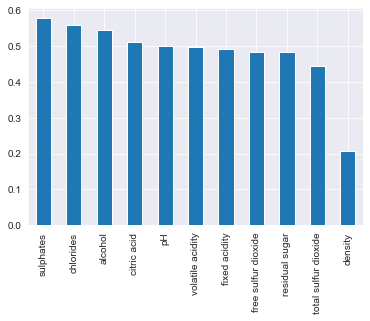

In [56]:
mutual_info.sort_values(ascending=False).plot.bar()

In [57]:
#selecting 5 best features
from sklearn.feature_selection import SelectKBest

five_cols = SelectKBest(mutual_info_regression,k=5)
five_cols.fit(xtrain,ytrain)
xtrain.columns[five_cols.get_support()]

Index(['fixed acidity', 'chlorides', 'pH', 'sulphates', 'alcohol'], dtype='object')

## Model Building 

In [64]:
#importing important required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score,GridSearchCV,RandomizedSearchCV

In [61]:
# intialising models
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SV = SVC()
DTR = DecisionTreeClassifier()
RTF = RandomForestClassifier()
ADB = AdaBoostClassifier()
GB = GradientBoostingClassifier()

In [62]:
# list of model name and instances
models = [("Logistic Regression",LR),
          ("K Nearest Neighbor Classifier",KNN),
          ("Support Vector Classifier ",SV),
          ("Decision Tree Classifier ",DTR),
          ("Random forest Classifier ",RTF),
          ("AdaBoost Classifier ",ADB),
          ("Gradient Boosting Classifier ",GB)]

***** Logistic Regression *****

 accuracy score :  0.9237875288683602

 cross validation score :  0.9117875966701148
              precision    recall  f1-score   support

           0       1.00      0.85      0.92       433
           1       0.87      1.00      0.93       433

    accuracy                           0.92       866
   macro avg       0.93      0.92      0.92       866
weighted avg       0.93      0.92      0.92       866

Precision:  0.9338677354709419
Recall:  0.9237875288683602
F1 score:  0.9233422746781115

 ROC_AUC_SCORE :  0.9237875288683604
AxesSubplot(0.125,0.536818;0.62x0.343182)


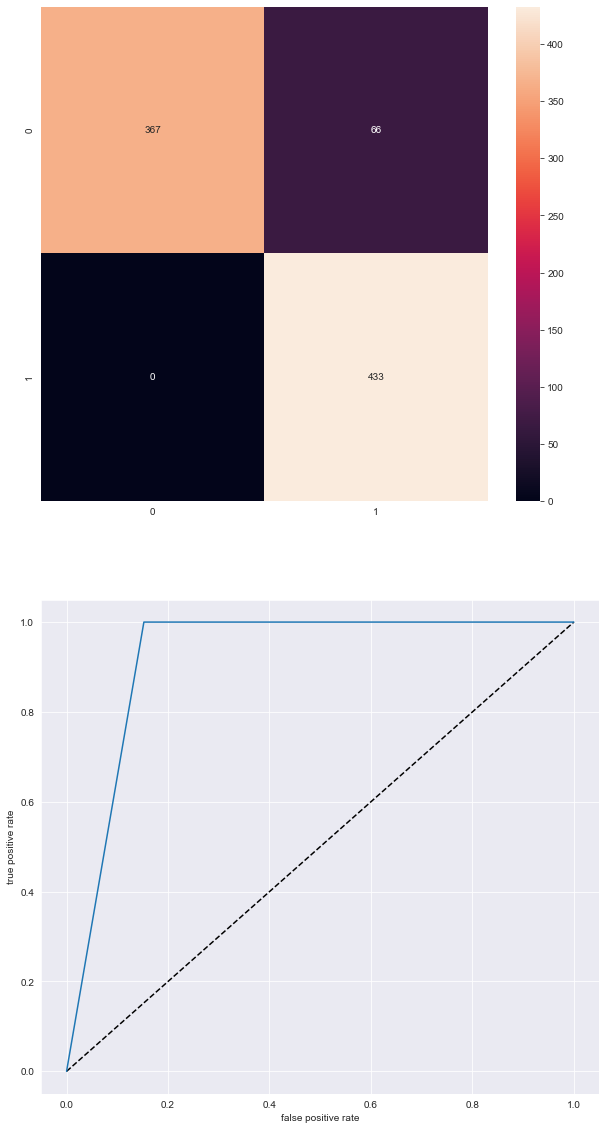

***** K Nearest Neighbor Classifier *****

 accuracy score :  0.8810623556581986

 cross validation score :  0.8760824589921679
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       433
           1       0.82      0.97      0.89       433

    accuracy                           0.88       866
   macro avg       0.89      0.88      0.88       866
weighted avg       0.89      0.88      0.88       866

Precision:  0.8935062789160607
Recall:  0.8810623556581986
F1 score:  0.8801145657348456

 ROC_AUC_SCORE :  0.8810623556581987
AxesSubplot(0.125,0.536818;0.62x0.343182)


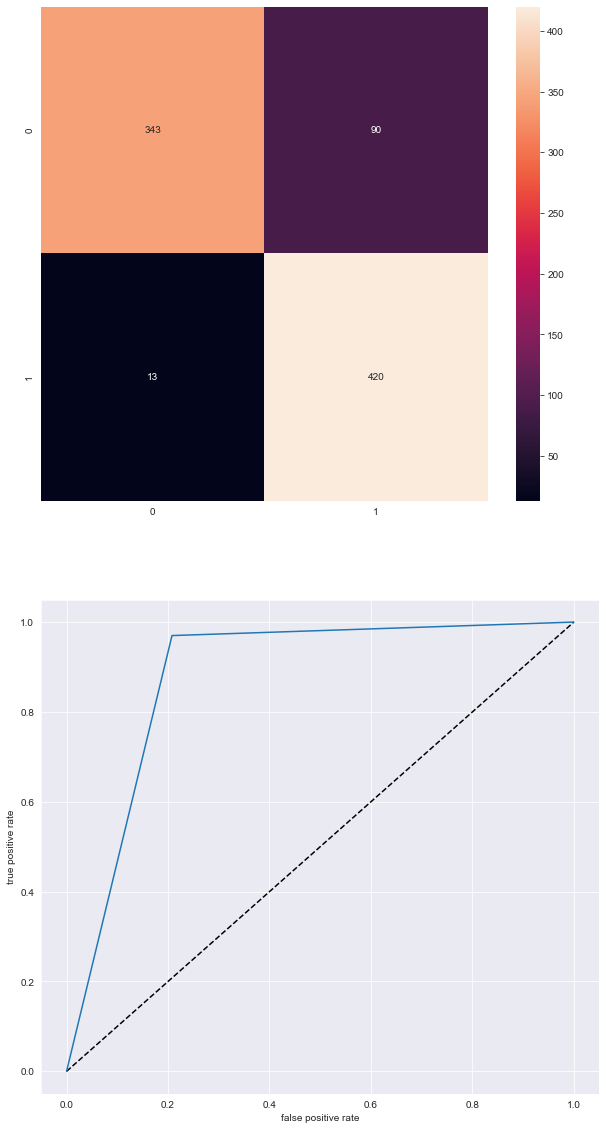

***** Support Vector Classifier  *****

 accuracy score :  0.8210161662817552

 cross validation score :  0.7864046106103147
              precision    recall  f1-score   support

           0       0.86      0.77      0.81       433
           1       0.79      0.87      0.83       433

    accuracy                           0.82       866
   macro avg       0.82      0.82      0.82       866
weighted avg       0.82      0.82      0.82       866

Precision:  0.8242135315664727
Recall:  0.8210161662817552
F1 score:  0.8205737949250576

 ROC_AUC_SCORE :  0.8210161662817552
AxesSubplot(0.125,0.536818;0.62x0.343182)


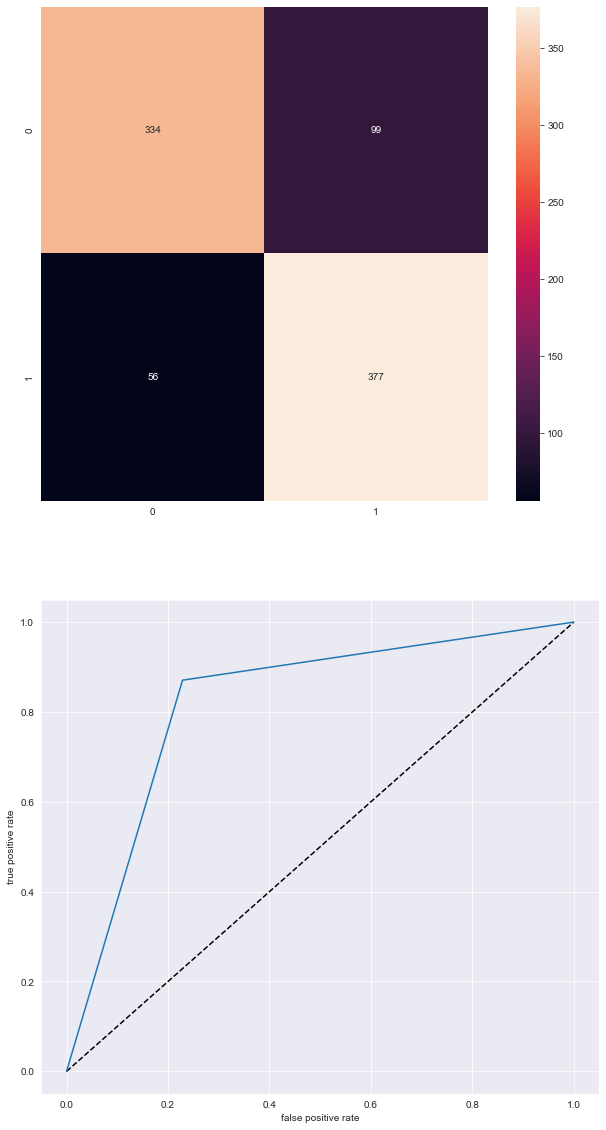

***** Decision Tree Classifier  *****

 accuracy score :  0.9780600461893765

 cross validation score :  0.9727328703019553
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       433
           1       0.97      0.98      0.98       433

    accuracy                           0.98       866
   macro avg       0.98      0.98      0.98       866
weighted avg       0.98      0.98      0.98       866

Precision:  0.9781237997695558
Recall:  0.9780600461893765
F1 score:  0.9780593147902941

 ROC_AUC_SCORE :  0.9780600461893764
AxesSubplot(0.125,0.536818;0.62x0.343182)


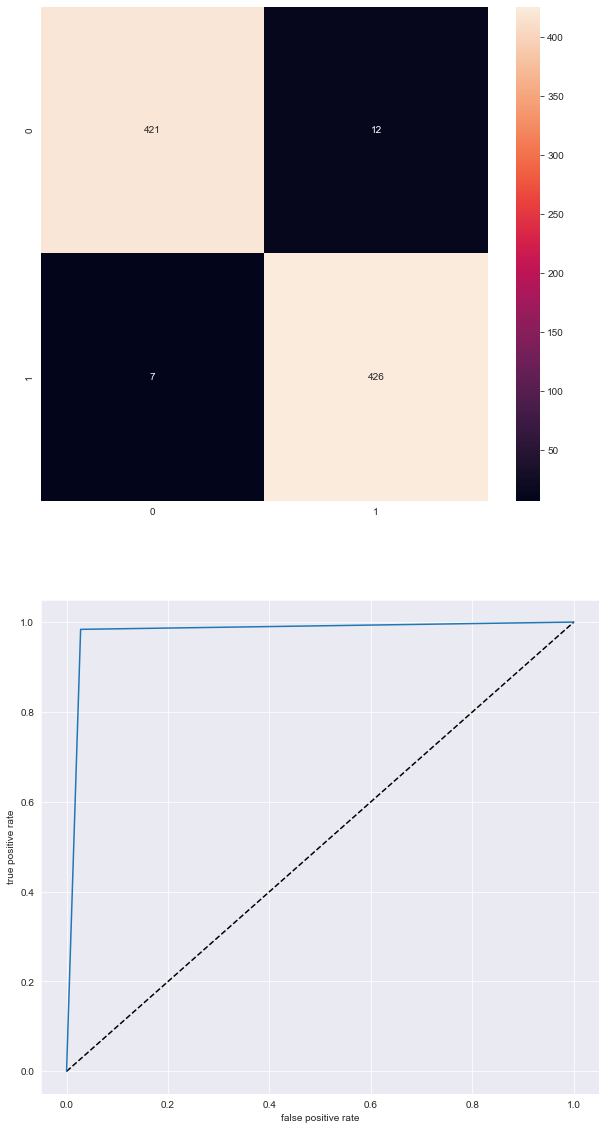

***** Random forest Classifier  *****

 accuracy score :  0.9896073903002309

 cross validation score :  0.9851337372543224
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       433
           1       0.98      1.00      0.99       433

    accuracy                           0.99       866
   macro avg       0.99      0.99      0.99       866
weighted avg       0.99      0.99      0.99       866

Precision:  0.9898190045248869
Recall:  0.9896073903002309
F1 score:  0.9896062677112852

 ROC_AUC_SCORE :  0.9896073903002309
AxesSubplot(0.125,0.536818;0.62x0.343182)


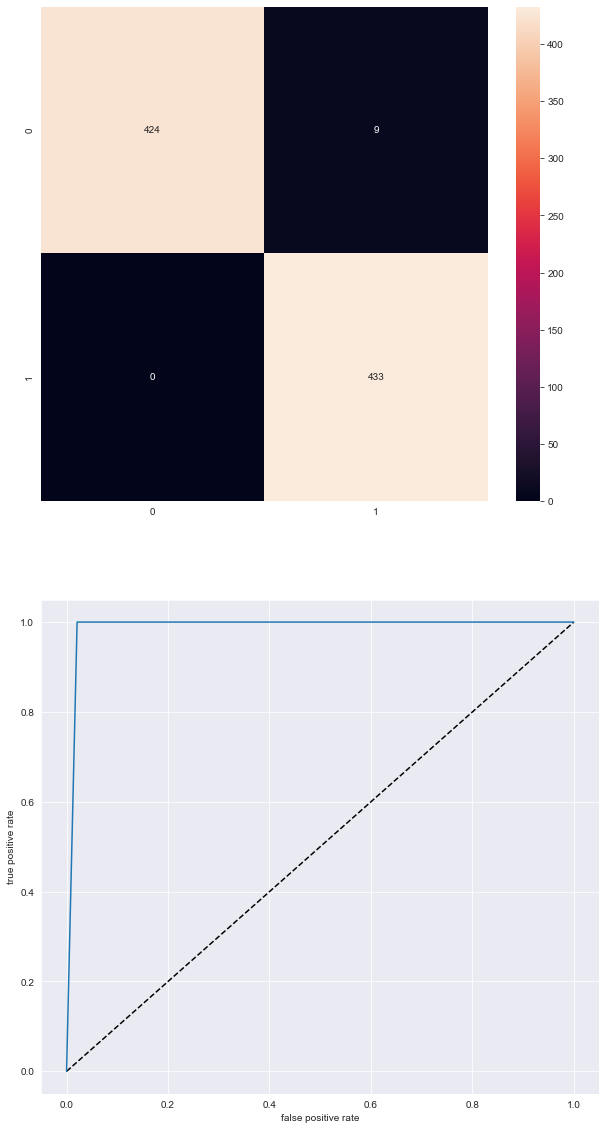

***** AdaBoost Classifier  *****

 accuracy score :  0.9734411085450346

 cross validation score :  0.9643121028520761
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       433
           1       0.96      0.99      0.97       433

    accuracy                           0.97       866
   macro avg       0.97      0.97      0.97       866
weighted avg       0.97      0.97      0.97       866

Precision:  0.9740099538619276
Recall:  0.9734411085450346
F1 score:  0.9734331380188361

 ROC_AUC_SCORE :  0.9734411085450347
AxesSubplot(0.125,0.536818;0.62x0.343182)


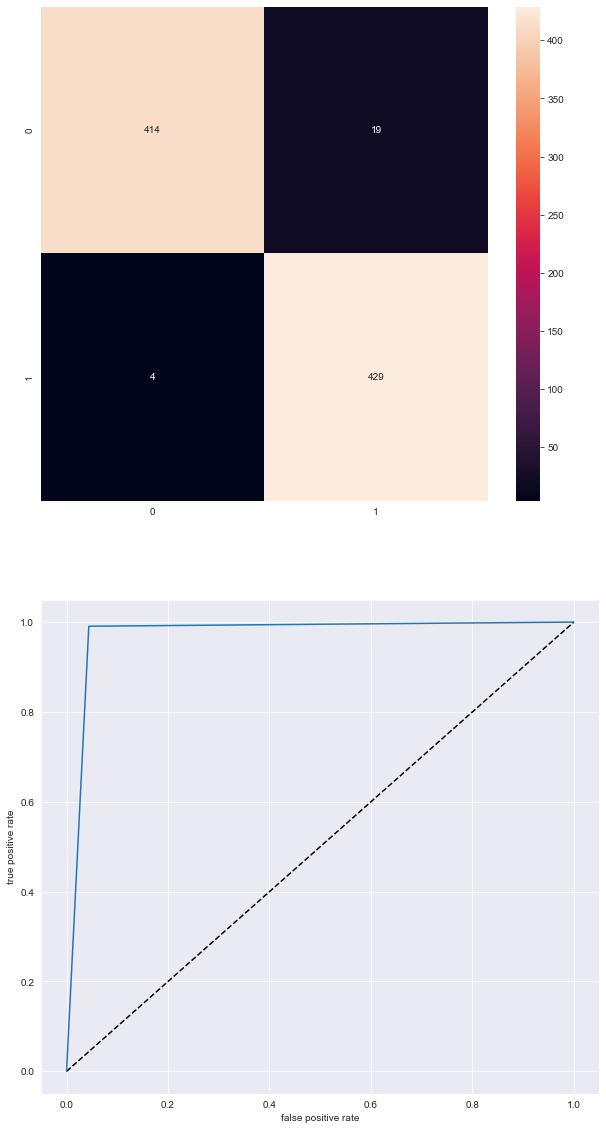

***** Gradient Boosting Classifier  *****

 accuracy score :  0.9792147806004619

 cross validation score :  0.9757130190631003
              precision    recall  f1-score   support

           0       1.00      0.96      0.98       433
           1       0.96      1.00      0.98       433

    accuracy                           0.98       866
   macro avg       0.98      0.98      0.98       866
weighted avg       0.98      0.98      0.98       866

Precision:  0.9800443458980045
Recall:  0.9792147806004619
F1 score:  0.9792057969777171

 ROC_AUC_SCORE :  0.979214780600462
AxesSubplot(0.125,0.536818;0.62x0.343182)


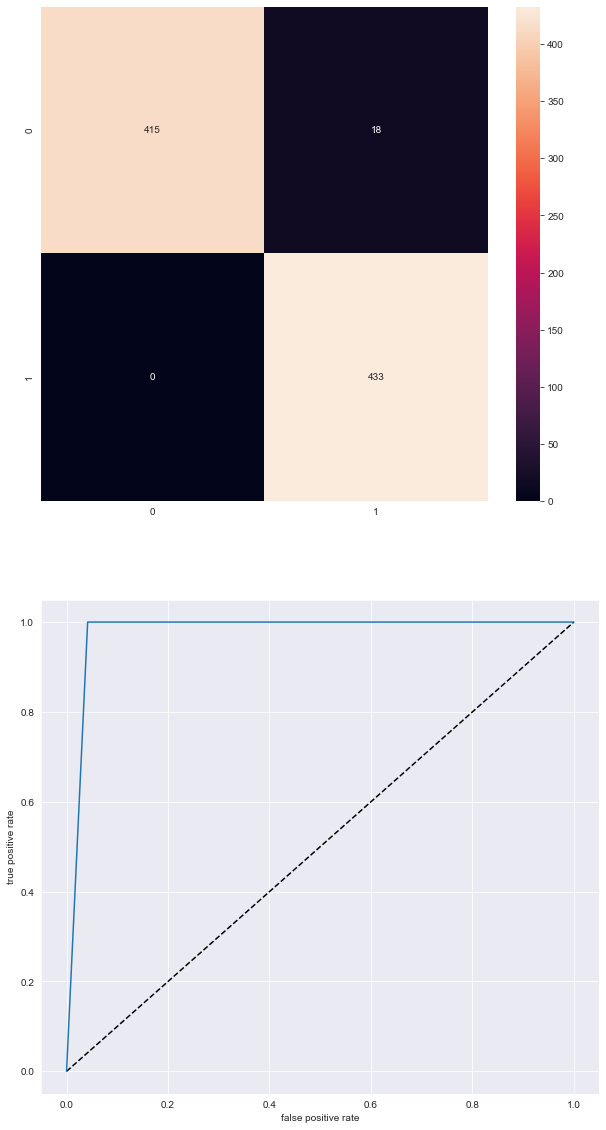

In [66]:
# running a for loop on list of models
for name, model in models:
    print("*****",name,"*****")
    model.fit(xtrain, ytrain) 
    pred = model.predict(xtest)
    accuracy = accuracy_score(ytest,pred)
    print("\n","accuracy score : ",accuracy)
    cross=cross_val_score(model,xtrain,ytrain,cv=10,scoring="accuracy").mean()
    print("\n","cross validation score : ",cross)
    cm = confusion_matrix(ytest,pred)
    print(classification_report(ytest,pred))
    precision = precision_score(ytest, pred,average='weighted')
    print('Precision: ', precision)
    recall = recall_score(ytest, pred,average='weighted')
    print('Recall: ', recall)
    f1 = f1_score(ytest, pred,average='weighted')
    print('F1 score: ', f1)
    fpr,tpr,thresholds=roc_curve(ytest,pred)
    roc_auc = auc(fpr,tpr)
    print("\n","ROC_AUC_SCORE : ",roc_auc)
    plt.figure(figsize=(10,20))
    plt.subplot(211)
    print(sns.heatmap(cm,annot=True,fmt='d'))
    plt.subplot(212)
    plt.plot([0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.show()

Choosing random forest as the best model here due to higher accuracy and f1,cross validation scores.

## Hyperparameter tuning

In [68]:
#selecting the parameters
param = {'n_estimators':[100, 150 ,200],
              'criterion':['gini','entropy'],
              'max_depth':[6,8,10,12],
              'max_features':['auto', 'sqrt', 'log2'],
              'class_weight':['balanced','balanced_subsample'],
              'random_state':(np.arange(2,200))}
#applying randomised search for the best parameters
gd = RandomizedSearchCV(RTF,param,cv=5)
gd.fit(xtrain,ytrain)
# checking best parameters for more generalised model
gd.best_params_

{'random_state': 185,
 'n_estimators': 150,
 'max_features': 'log2',
 'max_depth': 12,
 'criterion': 'entropy',
 'class_weight': 'balanced'}

In [ ]:
# tuning the model with best parameters

In [71]:
tuned_model = RandomForestClassifier(n_estimators=150,class_weight='balanced',criterion='entropy',max_depth= 12,max_features='log2',random_state=185)
tuned_model.fit(xtrain,ytrain)
tuned_pred = tuned_model.predict(xtest)
print(accuracy_score(ytest,tuned_pred))
print(classification_report(ytest,tuned_pred))
print("cross validation score : ",cross_val_score(tuned_model,xtrain,ytrain,cv=10,scoring="accuracy").mean())

0.9849884526558892
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       433
           1       0.97      1.00      0.99       433

    accuracy                           0.98       866
   macro avg       0.99      0.98      0.98       866
weighted avg       0.99      0.98      0.98       866

cross validation score :  0.9851337372543224


## Saving the Tuned model

In [73]:
import joblib
joblib.dump(tuned_model,'RedWineQuality_Model.pkl')

['RedWineQuality_Model.pkl']